### UK Inflation

_Show UK Inflation Rate by yearly, quarterly and monthly time frames_

#### Data Dictionary

| Name      | Description                                                                |
| --------- | -------------------------------------------------------------------------- |
| Year      | The year when the data was sampled                                         |
| Period    | The time period sampled (only available for quarterly and monthly periods) |
| Inflation | The rate of inflation of the sampled time period                           | 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

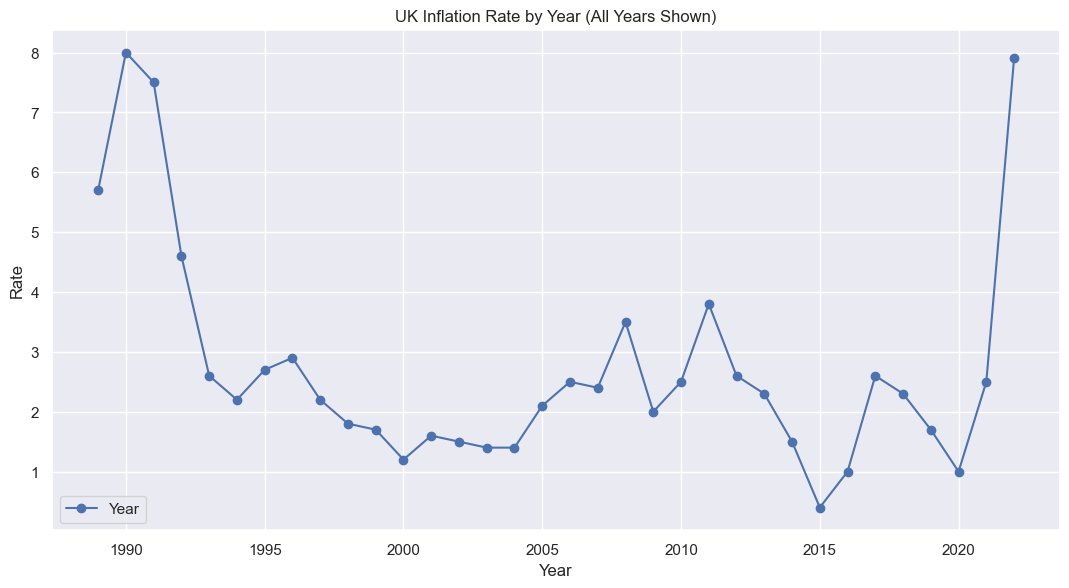

In [2]:
by_year = pd.read_csv('data/uk-inflation-by-year.csv')

year = by_year['Year']
inflation = by_year['Inflation']

plt.figure(figsize=(13, 6.5))
plt.plot(year, inflation, label='Year', marker='o')
plt.title('UK Inflation Rate by Year (All Years Shown)')
plt.xlabel('Year')
plt.ylabel('Rate')
plt.legend()
plt.show()

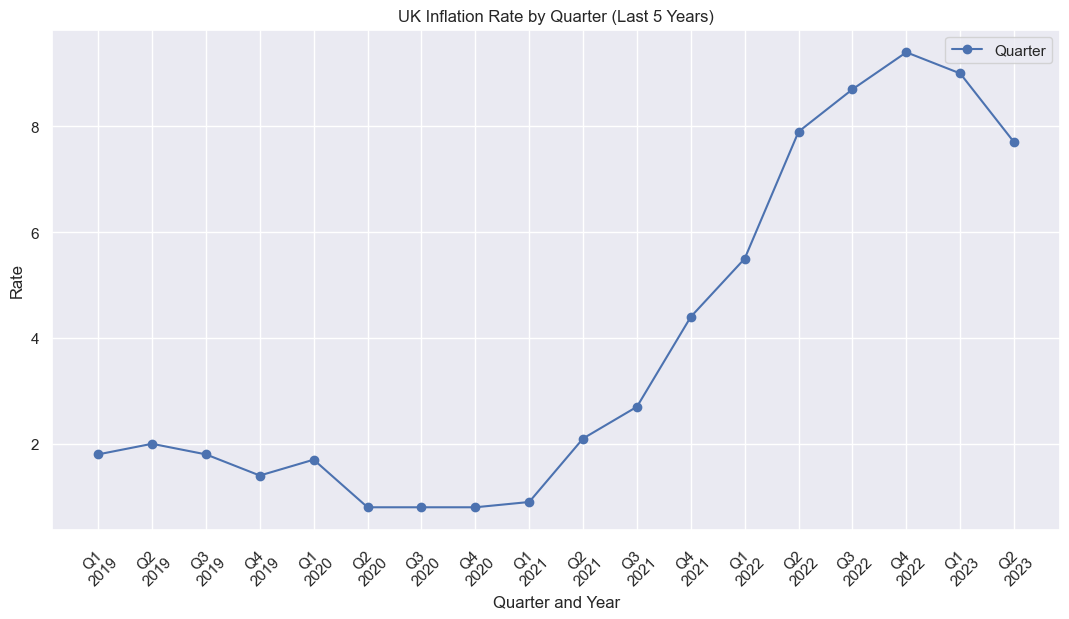

In [3]:
def plot_inflation_by_period(csv_file, period_years):
    by_quarter = pd.read_csv(csv_file)
    by_quarter['Year'] = by_quarter['Year'].astype(int)

    start_year = by_quarter['Year'].max() - period_years + 1
    
    selected_period = by_quarter.loc[by_quarter['Year'] >= start_year].copy()
    selected_period['Year'] = selected_period['Year'].astype(str)
    selected_period['Quarter'] = selected_period['Quarter'].astype(str)
    selected_period['YearQuarter'] = selected_period['Year'] + '-' + selected_period['Quarter']
    
    x_labels = [f"{quarter}\n{year}" for year, quarter in zip(selected_period['Year'], selected_period['Quarter'])]

    plt.figure(figsize=(13, 6.5))
    plt.plot(selected_period['YearQuarter'], selected_period['Inflation'], label='Quarter', marker='o')
    plt.title(f'UK Inflation Rate by Quarter (Last {period_years} Years)')
    plt.xlabel('Quarter and Year')
    plt.ylabel('Rate')
    plt.legend()
    plt.xticks(ticks=selected_period['YearQuarter'], labels=x_labels, rotation=45)
    plt.grid(True)
    plt.show()

plot_inflation_by_period('data/uk-inflation-by-quarter.csv', 5)


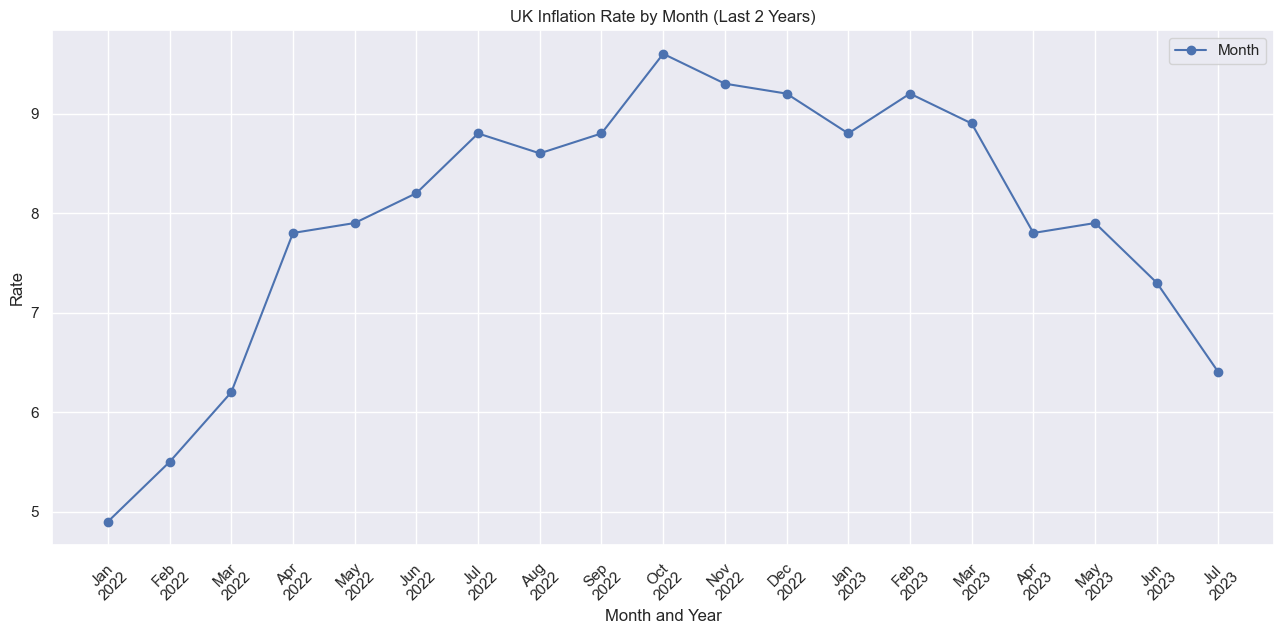

In [4]:
def plot_inflation_by_period_monthly(csv_file, period_years, selected_year):
    by_month = pd.read_csv(csv_file)
    by_month['Year'] = by_month['Year'].astype(int)

    start_year = by_month['Year'].max() - period_years + 1
    
    selected_period = by_month.loc[by_month['Year'] >= start_year].copy()
    selected_period['Month'] = selected_period.apply(lambda row:row['Month'].capitalize(), axis=1)
    selected_period['YearMonth'] = selected_period['Year'].astype(str) + '-' + selected_period['Month']

    x_labels = [f"{month}\n{year}" for year, month in zip(selected_period['Year'], selected_period['Month'])]

    plt.figure(figsize=(13, 6.5))
    plt.plot(selected_period['YearMonth'], selected_period['Inflation'], label='Month', marker='o')
    plt.title(f'UK Inflation Rate by Month (Last {period_years} Years)')
    plt.xlabel('Month and Year')
    plt.ylabel('Rate')
    plt.legend()
    plt.xticks(ticks=selected_period['YearMonth'], labels=x_labels, rotation=45)
    plt.grid(True)
    plt.tight_layout()
    plt.show()

plot_inflation_by_period_monthly('data/uk-inflation-by-month.csv', 2, 2022)
